In [1]:
import csv
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords

C:\Users\Shibin Paul\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Shibin Paul\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Shibin Paul\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
print(np.__version__)
print(tf.__version__)

1.19.5
2.3.0


#### Set up stopwords

In [3]:
STOPWORDS = set(stopwords.words('english'))

#### Set up key parameters

In [4]:
vocab_size = 5000
embedding_dim = 64
max_length = 200
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_portion = .8

In [5]:
#create empty lists for articles and their corresponding labels
articles = []
labels = []

#### Read the BBC headline corpus

In [6]:
# importing csv module
import csv

# csv file name
filename = "bbc-text.csv"

# initializing the titles and rows list
fields = []
rows = []

# reading csv file
with open(filename, 'r') as csvfile:
	# creating a csv reader object
	csvreader = csv.reader(csvfile)
	
	# extracting field names through first row
	fields = next(csvreader)

	# extracting each data row one by one
	for row in csvreader:
		rows.append(row)

	# get total number of rows
	print("Total no. of rows: %d"%(csvreader.line_num))

# printing the field names
print('Field names are:' + ', '.join(field for field in fields))

# printing first 5 rows
print('\nFirst 5 rows are:\n')
for row in rows[:5]:
	# parsing each column of a row
	for col in row:
		print("%10s"%col,end=" "),
	print('\n')


Total no. of rows: 2226
Field names are:category, text

First 5 rows are:

      tech tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the 

#### Append articles and labels to seperate lists

In [6]:
with open('bbc-text.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[0])
        article = row[1]
        for word in STOPWORDS:
            token = ' ' + word + ' '
            article = article.replace(token, ' ')
            article = article.replace(' ', ' ')
        articles.append(article)
print(len(labels))
print(len(articles))

2225
2225


In [59]:
sorted(set(labels))

['bussiness', 'entertainment', 'politics', 'sport', 'tech']

#### Split Training and Validation data

In [8]:
train_size = int(len(articles) * training_portion)

train_articles = articles[:train_size]
train_labels = labels[:train_size]

validation_articles = articles[train_size:]
validation_labels = labels[train_size:]


print(train_size)
print(len(train_articles))
print(len(train_labels))
print(len(validation_articles))
print(len(validation_labels))

1780
1780
1780
445
445


#### Tokenizing and Padding the data

In [9]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_articles)
word_index = tokenizer.word_index
#dict(list(word_index.items())[:20])

In [10]:
#check sequenced texts
train_sequences = tokenizer.texts_to_sequences(train_articles)
print(train_sequences[1779])

[91, 3812, 1, 1, 2863, 18, 1, 1, 2712, 961, 3419, 453, 1446, 283, 26, 58, 2863, 18, 99, 20, 1122, 5, 100, 961, 6, 1, 666, 2660, 2, 463, 4709, 8, 619, 1498, 159, 20, 927, 147, 3069, 7, 219, 2556, 1567, 3812, 2, 1, 961, 12, 58, 98, 383, 1, 1, 676, 1822, 199, 111, 443, 3812, 2, 4, 28, 38, 816, 2677, 2863, 18, 139, 1106, 2772, 2828, 58, 522, 1, 3016, 453, 1446, 2473, 1433, 147, 1, 70, 1, 1, 3983, 160, 1, 1, 528, 2808, 1, 91, 283, 58, 1, 2863, 18, 453, 1446, 1294, 142, 1, 1, 2960, 283, 2292, 247, 19, 3812, 276, 485, 6, 1, 37, 10, 4068, 1460, 330]


In [11]:
#Add padding to the squences to keep all the sentences similar in length and format
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [12]:
#check for difference between tokenized and tokenized + padded sequences
print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

426
200
192
200
186
200


In [13]:
print(train_sequences[10])
print(train_padded[10])

[2432, 1, 225, 4996, 22, 641, 587, 225, 4996, 1, 1, 1662, 1, 1, 2432, 22, 564, 1, 1, 140, 278, 1, 140, 278, 796, 822, 662, 2308, 1, 1144, 1693, 1, 1721, 4997, 1, 1, 1, 1, 1, 4739, 1, 1, 122, 4514, 1, 2, 2874, 1505, 352, 4740, 1, 52, 341, 1, 352, 2171, 3962, 41, 22, 3794, 1, 1, 1, 1, 542, 1, 1, 1, 835, 631, 2367, 347, 4741, 1, 365, 22, 1, 787, 2368, 1, 4302, 138, 10, 1, 3665, 682, 3532, 1, 22, 1, 414, 822, 662, 1, 90, 13, 633, 1, 225, 4996, 1, 599, 1, 1693, 1021, 1, 4998, 807, 1864, 117, 1, 1, 1, 2974, 22, 1, 99, 278, 1, 1608, 4999, 542, 492, 1, 1444, 4742, 778, 1320, 1, 1861, 10, 33, 641, 319, 1, 62, 478, 564, 301, 1506, 22, 479, 1, 1, 1665, 1, 797, 1, 3067, 1, 1364, 6, 1, 2432, 564, 22, 2971, 4736, 1, 1, 1, 1, 1, 850, 39, 1825, 675, 297, 26, 979, 1, 882, 22, 361, 22, 13, 301, 1506, 1342, 374, 20, 63, 883, 1096, 4303, 247]
[2432    1  225 4996   22  641  587  225 4996    1    1 1662    1    1
 2432   22  564    1    1  140  278    1  140  278  796  822  662 2308
    1 1144 1693    1 17

In [14]:
#Tokenize and pad validation sequences too
validation_sequences = tokenizer.texts_to_sequences(validation_articles)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length,
                                  padding=padding_type, truncating=trunc_type)


print(len(validation_sequences))
print(validation_padded.shape)

445
(445, 200)


In [15]:
# Tokenizing the labbels
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

[4]
[2]
[1]
(1780, 1)
[5]
[4]
[3]
(445, 1)


#### Dictionary of tokenized data for decoding

In [16]:
rev_word_index = dict([(val, key) for (key,val) in word_index.items()])

In [17]:
def decode_article(text):
    return ' '.join([rev_word_index.get(i,'?') for i in text])

In [18]:
#test the original and decoded text
print(train_articles[10])
print("=============================================================")
print(decode_article(train_padded[10]))

berlin cheers anti-nazi film german movie anti-nazi resistance heroine drawn loud applause berlin film festival.  sophie scholl - final days portrays final days member white rose movement. scholl  21  arrested beheaded brother  hans  1943 distributing leaflets condemning  abhorrent tyranny  adolf hitler. director marc rothemund said:  feeling responsibility keep legacy scholls going.   must somehow keep ideas alive   added.  film drew transcripts gestapo interrogations scholl trial preserved archive communist east germany secret police. discovery inspiration behind film rothemund  worked closely surviving relatives  including one scholl sisters  ensure historical accuracy film. scholl members white rose resistance group first started distributing anti-nazi leaflets summer 1942. arrested dropped leaflets munich university calling  day reckoning  adolf hitler regime. film focuses six days scholl arrest intense trial saw scholl initially deny charges ended defiant appearance. one three ge

#### Build a RNN for training the corpus

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    tf.keras.layers.Dense(6, activation = 'softmax')
])

#

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          320000    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 390       
Total params: 394,694
Trainable params: 394,694
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
num_epochs = 10
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2)

Epoch 1/10
56/56 - 12s - loss: 1.5659 - accuracy: 0.2719 - val_loss: 1.3875 - val_accuracy: 0.3640
Epoch 2/10
56/56 - 11s - loss: 1.1710 - accuracy: 0.4809 - val_loss: 0.9377 - val_accuracy: 0.5663
Epoch 3/10
56/56 - 9s - loss: 0.5005 - accuracy: 0.8416 - val_loss: 0.6728 - val_accuracy: 0.7933
Epoch 4/10
56/56 - 10s - loss: 0.1587 - accuracy: 0.9556 - val_loss: 0.3121 - val_accuracy: 0.9034
Epoch 5/10
56/56 - 9s - loss: 0.0356 - accuracy: 0.9904 - val_loss: 0.3042 - val_accuracy: 0.9034
Epoch 6/10
56/56 - 9s - loss: 0.0162 - accuracy: 1.0000 - val_loss: 0.3047 - val_accuracy: 0.9348
Epoch 7/10
56/56 - 10s - loss: 0.0042 - accuracy: 0.9994 - val_loss: 0.3231 - val_accuracy: 0.9326
Epoch 8/10
56/56 - 10s - loss: 0.0059 - accuracy: 0.9989 - val_loss: 0.4135 - val_accuracy: 0.9146
Epoch 9/10
56/56 - 10s - loss: 0.0036 - accuracy: 0.9994 - val_loss: 0.3426 - val_accuracy: 0.9236
Epoch 10/10
56/56 - 9s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.3447 - val_accuracy: 0.9371


#### Plotting Loss and Accuracy performances

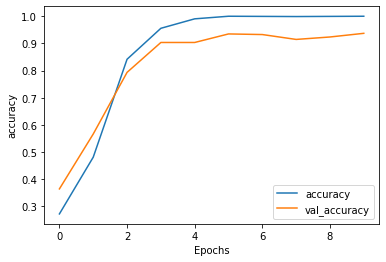

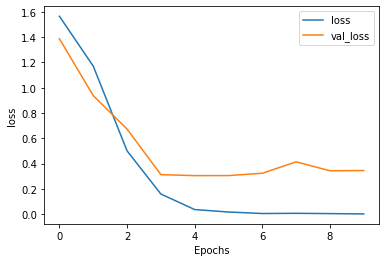

In [23]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

#### Get Predictions!

In [28]:
results = model.predict(validation_padded)

In [30]:
print(validation_articles[0])
print(validation_labels[0])

hobbit picture  four years away  lord rings director peter jackson said four years starts work film version hobbit.  oscar winner said visit sydney  desire  make  lengthy negotiations.  think gonna lot lawyers sitting room trying thrash deal ever happen   said new zealander. rights jrr tolkien book split two major film studios. jackson  currently filming remake hollywood classic king kong  said thought sale mgm studios sony corporation would cast uncertainty project. 43-year-old australian city visit lord rings exhibition  attracted 140 000 visitors since opened december.  film-maker recently sued film company new line cinema undisclosed damages alleged withheld profits lost revenue first part middle earth trilogy. fellowship ring 2001 went make worldwide profits $291 million (Â£152 million). jackson thought secured lucrative film directing deal history remake king kong  currently production wellington. picture  stars naomi watts oscar winner adrien brody  due released december. jackso

In [31]:
print(results[0])

[2.8384448e-04 2.1959210e-04 6.5156753e-04 7.9190446e-04 6.8607125e-03
 9.9119240e-01]


In [34]:
labels = ['sport', 'bussiness', 'politics', 'tech', 'entertainment']
print(labels[np.argmax(results[0]) - 1])


entertainment


In [1]:
#Modularising the predict function
def predict_category(val_index):
    labels = ['sport', 'bussiness', 'politics', 'tech', 'entertainment']
    model.predict(validation_padded[val_index])
    print('Article:', validation_articles[val_index])
    print('===========================================')
    print('Label:', validation_labels[val_index])
    print('===========================================')
    print('Predicted Label:',labels[np.argmax(results[val_index]) - 1])
    

In [60]:
predict_category(0)

Article: hobbit picture  four years away  lord rings director peter jackson said four years starts work film version hobbit.  oscar winner said visit sydney  desire  make  lengthy negotiations.  think gonna lot lawyers sitting room trying thrash deal ever happen   said new zealander. rights jrr tolkien book split two major film studios. jackson  currently filming remake hollywood classic king kong  said thought sale mgm studios sony corporation would cast uncertainty project. 43-year-old australian city visit lord rings exhibition  attracted 140 000 visitors since opened december.  film-maker recently sued film company new line cinema undisclosed damages alleged withheld profits lost revenue first part middle earth trilogy. fellowship ring 2001 went make worldwide profits $291 million (Â£152 million). jackson thought secured lucrative film directing deal history remake king kong  currently production wellington. picture  stars naomi watts oscar winner adrien brody  due released decembe

In [55]:
def random_pred(random_article):
    txt = [random_article]
    seq = tokenizer.texts_to_sequences(txt)
    padded = pad_sequences(seq, maxlen=max_length)
    pred = model.predict(padded)
    labels = ['sport', 'bussiness', 'politics', 'tech', 'entertainment']
    print(labels[np.argmax(pred) - 1])

In [57]:
random_art = 'cars pull down us retail figures us retail sales fell 0.3% in january  the biggest monthly decline since last august  driven down by a heavy fall in car sales.  the 3.3% fall in car sales had been expected  coming after december s 4% rise in car sales  fuelled by generous pre-christmas special offers. excluding the car sector  us retail sales were up 0.6% in january  twice what some analysts had been expecting. us retail spending is expected to rise in 2005  but not as quickly as in 2004.  steve gallagher  us chief economist at sg corporate & investment banking  said january s figures were  decent numbers .   we are not seeing the numbers that we saw in the second half of 2004  but they are still pretty healthy   he added. sales at appliance and electronic stores were down 0.6% in january  while sales at hardware stores dropped by 0.3% and furniture store sales dipped 0.1%. sales at clothing and clothing accessory stores jumped 1.8%  while sales at general merchandise stores  a category that includes department stores  rose by 0.9%. these strong gains were in part put down to consumers spending gift vouchers they had been given for christmas.  sales at restaurants  bars and coffee houses rose by 0.3%  while grocery store sales were up 0.5%. in december  overall retail sales rose by 1.1%. excluding the car sector  sales rose by just 0.3%. parul jain  deputy chief economist at nomura securities international  said consumer spending would continue to rise in 2005  only at a slower rate of growth than in 2004.  consumers continue to retain their strength in the first quarter   he said. van rourke  a bond strategist at popular securities  agreed that the latest retail sales figures were  slightly stronger than expected .'
random_pred(random_art)

bussiness
